In [1]:
base_dir = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT"
out_dir = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT_numpy"

In [2]:
!python "/home/serverai/ltdoanh/Motion_Diffusion/datasets/step1_fit_scaler.py" --parent-dir "{base_dir}" --start 1 --end 4


🔍 Scanning: /home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT
  Scanning folder 1...
  Scanning folder 2...
  Scanning folder 3...
  Scanning folder 4...

✅ Found 20 BVH files

🚀 PASS 1: Multiprocessing parse + transform (to before ConstantsRemover)...
   Using 12 CPU cores
Pass 1: Parsing & transforming:   0%|                    | 0/20 [00:00<?, ?it/s]    ❌ 2_scott_0_1_1.bvh: list index out of range
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pos_df['%s_Yposition'%joint] = pd.Series(data=[e[1] for e in tree_data[joint][1]], index=pos_df.index)
/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:152: PerformanceWarning: DataFrame is highly fragmen

In [4]:
!python "/home/serverai/ltdoanh/Motion_Diffusion/datasets/preprocess_data.py" --parent-dir "{base_dir}" --out-root "{out_dir}" --start 1 --end 4


🔍 Scanning parent directory: /home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT
✅ Pipeline found: global_pipeline.pkl
📂 Will process 4 folders: ['1', '2', '3', '4']

[1/4] Processing folder: 1

📋 Scanning for BVH files in /home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT/1
✅ Found 5 files to process
🚀 Processing with 12 workers...
Worker 3836034 initializing...
Worker 3836035 initializing...
Worker 3836036 initializing...
Worker 3836037 initializing...
Worker 3836038 initializing...
Worker 3836039 initializing...
Worker 3836040 initializing...
Worker 3836041 initializing...
Worker 3836043 initializing...
Worker 3836044 initializing...
Worker 3836045 initializing...
Worker 3836047 initializing...
Processing 1:   0%|                                       | 0/5 [00:00<?, ?it/s]/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo/pymo/preprocessing.py:151: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [5]:
!python "/home/serverai/ltdoanh/Motion_Diffusion/tools/train.py" --dataset_name beat

------------ Options -------------
batch_size: 32
checkpoints_dir: ./checkpoints
data_parallel: False
dataset_name: beat
decomp_name: Decomp_SP001_SM001_H512
diffusion_steps: 1000
dim_att_vec: 512
dim_dec_hidden: 1024
dim_movement_dec_hidden: 512
dim_movement_enc_hidden: 512
dim_movement_latent: 512
dim_pos_hidden: 1024
dim_pri_hidden: 1024
dim_text_hidden: 512
dim_z: 128
distributed: False
estimator_mod: bigru
eval_every_e: 5
feat_bias: 25
gpu_id: -1
is_continue: False
is_train: True
latent_dim: 512
log_every: 50
lr: 0.0002
max_text_len: 20
motion_rep: axis_angle
n_layers_dec: 1
n_layers_pos: 1
n_layers_pri: 1
name: test
no_clip: False
no_eff: False
num_epochs: 50
num_layers: 8
save_every_e: 5
save_latest: 500
text_enc_mod: bigru
times: 1
unit_length: 4
-------------- End ----------------
/srv/conda/envs/serverai/layout/lib/python3.10/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.

✅ Imports successful!
📦 Loading pipeline from: /home/serverai/ltdoanh/Motion_Diffusion/global_pipeline.pkl
✅ Pipeline loaded!
   Mean shape: (264,), First 5 values: [-0.1703694   5.69030859 -4.99893673 -0.0872264  17.42595046]
   Std shape: (264,),  First 5 values: [1.00697522 1.6353986  0.60366938 2.17487778 1.67274958]

🎬 Visualizing: 1_wayne_0_1_1_sentence_000.npy
   Frame: 50
   Motion shape: (164, 264)
   Performing inverse transform...
positions 2 eulers is not supported
   ✅ Reconstructed shape: (164, 264)

   Creating 2D visualization...


<Figure size 1000x800 with 0 Axes>

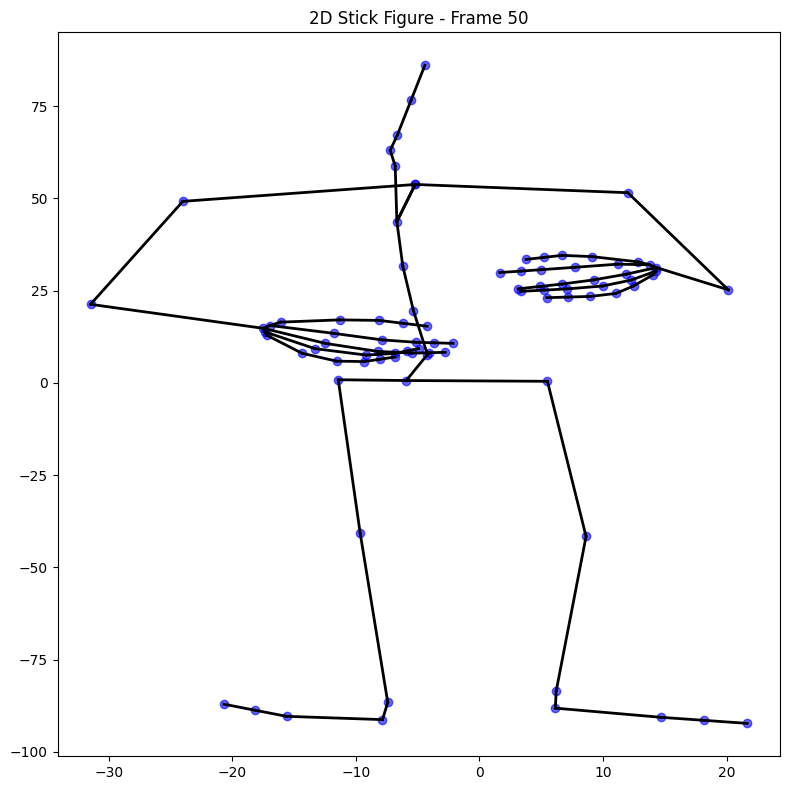

   ✅ 2D plot displayed!

   Creating 3D visualization...


<Figure size 1000x800 with 0 Axes>

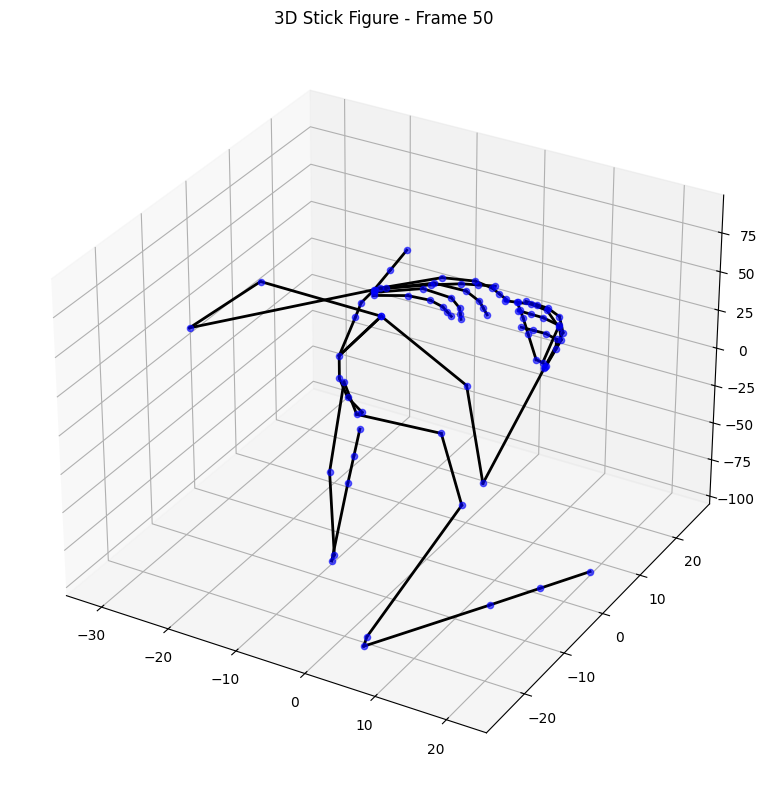

   ✅ 3D plot displayed!


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
import os
import numpy as np
import joblib

# Setup path
PYOM_DIR = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo"
if PYOM_DIR not in sys.path:
    sys.path.insert(0, PYOM_DIR)

from pymo.parsers import BVHParser
from pymo.preprocessing import *
from pymo.viz_tools import draw_stickfigure, draw_stickfigure3d
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

print("✅ Imports successful!")

# ===== CELL 2: Load Pipeline =====
pipeline_path = "/home/serverai/ltdoanh/Motion_Diffusion/global_pipeline.pkl"

print(f"📦 Loading pipeline from: {pipeline_path}")

pipeline = joblib.load(pipeline_path)
print(f"✅ Pipeline loaded!")
print(f"   Mean shape: {pipeline.named_steps['stdscale'].data_mean_.shape}, First 5 values: {pipeline.named_steps['stdscale'].data_mean_[:5]}")
print(f"   Std shape: {pipeline.named_steps['stdscale'].data_std_.shape},  First 5 values: {pipeline.named_steps['stdscale'].data_std_[:5]}")

# ===== CELL 3: Load and Visualize Motion =====
npy_path = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT_numpy/npy/1/1_wayne_0_1_1_sentence_000.npy"
frame = 50

print(f"\n🎬 Visualizing: {os.path.basename(npy_path)}")
print(f"   Frame: {frame}")

# Load motion data
motion_data = np.load(npy_path)
print(f"   Motion shape: {motion_data.shape}")

# Inverse transform
print("   Performing inverse transform...")
reconstructed = pipeline.inverse_transform([motion_data])
print(f"   ✅ Reconstructed shape: {reconstructed[0].values.shape}")

# Visualize 2D
print("\n   Creating 2D visualization...")
fig1 = plt.figure(figsize=(10, 8))
draw_stickfigure(reconstructed[0], frame=frame)
plt.title(f"2D Stick Figure - Frame {frame}")
plt.tight_layout()
plt.show()

print("   ✅ 2D plot displayed!")

# Visualize 3D
print("\n   Creating 3D visualization...")
fig2 = plt.figure(figsize=(10, 8))
draw_stickfigure3d(reconstructed[0], frame=frame)
plt.title(f"3D Stick Figure - Frame {frame}")
plt.tight_layout()
plt.show()

print("   ✅ 3D plot displayed!")

✅ Imports successful!

🔨 Creating pipeline from scratch...
   Fitting on BVH sample: 1_wayne_0_1_1.bvh
   ✅ Pipeline fitted (structure learned)

📊 Loading meta statistics:
   Mean: /home/serverai/ltdoanh/Motion_Diffusion/checkpoints/beat/test/meta/mean.npy
   Std: /home/serverai/ltdoanh/Motion_Diffusion/checkpoints/beat/test/meta/std.npy
   ✅ Mean shape: (264,), Mean first 5 values: [ 0.0132395   0.06677272 -0.05542448 -0.00862331  0.06532999]
   ✅ Std shape: (264,), Std first 5 values: [0.93922817 1.01268221 0.97993897 0.93452245 1.01423911]

🔧 Overriding pipeline statistics with meta values...
   ✅ Pipeline updated with meta statistics!

🎬 Visualizing: 1_wayne_0_1_1_sentence_000.npy
   Frame: 50
   Motion shape: (164, 264)
   Performing inverse transform...
positions 2 eulers is not supported
   ✅ Reconstructed shape: (164, 264)

   Creating 2D visualization...


<Figure size 1000x800 with 0 Axes>

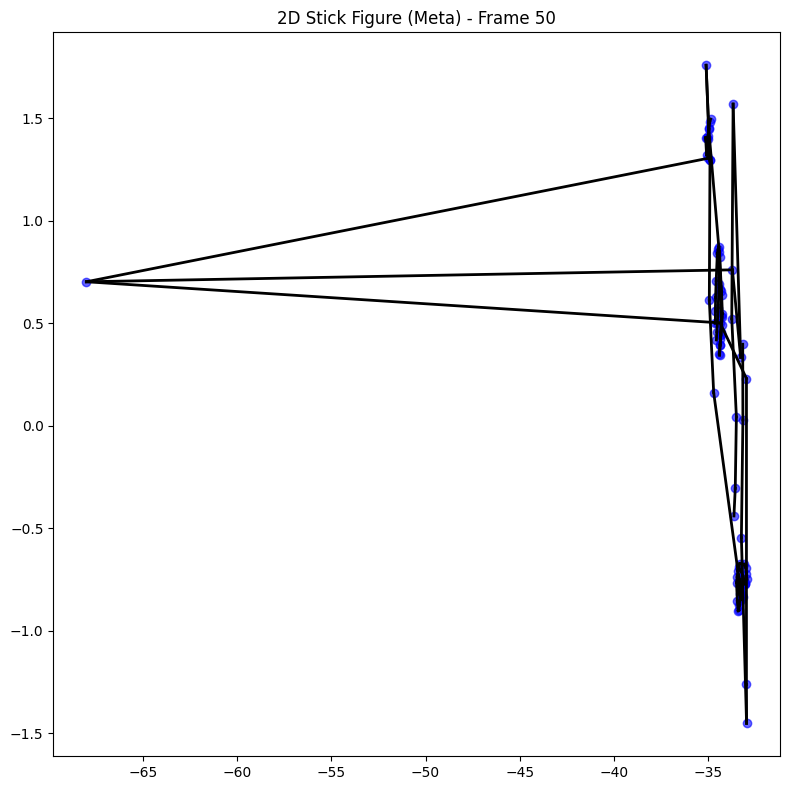

   ✅ 2D plot displayed!

   Creating 3D visualization...


<Figure size 1000x800 with 0 Axes>

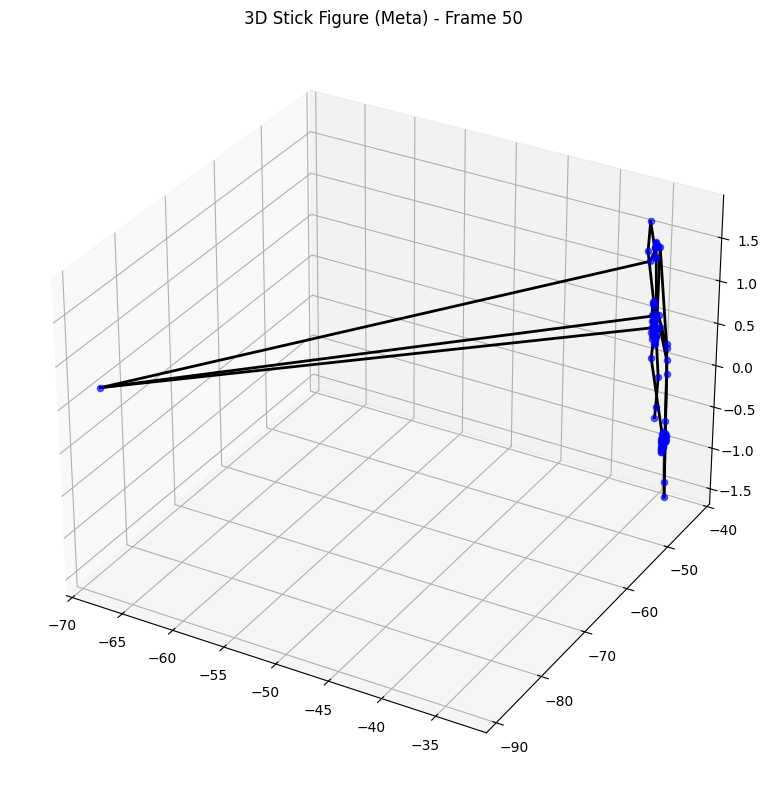

   ✅ 3D plot displayed!


In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import sys
import os
import numpy as np
import joblib

# Setup path
PYOM_DIR = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/pymo"
if PYOM_DIR not in sys.path:
    sys.path.insert(0, PYOM_DIR)

from pymo.parsers import BVHParser
from pymo.preprocessing import *
from pymo.viz_tools import draw_stickfigure, draw_stickfigure3d
from sklearn.pipeline import Pipeline

print("✅ Imports successful!")

# ===== CREATE PIPELINE WITH META =====
print("\n🔨 Creating pipeline from scratch...")

# 1. Create empty pipeline
pipeline = Pipeline([
    ('param', MocapParameterizer('position')),
    ('rcpn', RootCentricPositionNormalizer()),
    ('delta', RootTransformer('abdolute_translation_deltas')),
    ('const', ConstantsRemover()),
    ('np', Numpyfier()),
    ('down', DownSampler(2)),
    ('stdscale', ListStandardScaler())
])

# 2. Fit pipeline on sample BVH (to learn structure)
bvh_sample_path = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT/1/1_wayne_0_1_1.bvh"
print(f"   Fitting on BVH sample: {os.path.basename(bvh_sample_path)}")

parser = BVHParser()
parsed_data = parser.parse(bvh_sample_path)
pipeline.fit([parsed_data])
print("   ✅ Pipeline fitted (structure learned)")

# 3. Load mean/std from meta directory
meta_dir = "/home/serverai/ltdoanh/Motion_Diffusion/checkpoints/beat/test/meta"
mean_path = os.path.join(meta_dir, "mean.npy")
std_path = os.path.join(meta_dir, "std.npy")

print(f"\n📊 Loading meta statistics:")
print(f"   Mean: {mean_path}")
print(f"   Std: {std_path}")

mean_val = np.load(mean_path)
std_val = np.load(std_path)

print(f"   ✅ Mean shape: {mean_val.shape}, Mean first 5 values: {mean_val[:5]}")
print(f"   ✅ Std shape: {std_val.shape}, Std first 5 values: {std_val[:5]}")

# 4. Override pipeline's mean/std with meta values
print("\n🔧 Overriding pipeline statistics with meta values...")
pipeline.named_steps['stdscale'].data_mean_ = mean_val
pipeline.named_steps['stdscale'].data_std_ = std_val
print("   ✅ Pipeline updated with meta statistics!")

# ===== VISUALIZE MOTION =====
npy_path = "/home/serverai/ltdoanh/Motion_Diffusion/datasets/BEAT_numpy/npy/1/1_wayne_0_1_1_sentence_000.npy"
frame = 50

print(f"\n🎬 Visualizing: {os.path.basename(npy_path)}")
print(f"   Frame: {frame}")

# Load motion data
motion_data = np.load(npy_path)
print(f"   Motion shape: {motion_data.shape}")

# Inverse transform
print("   Performing inverse transform...")
reconstructed = pipeline.inverse_transform([motion_data])
print(f"   ✅ Reconstructed shape: {reconstructed[0].values.shape}")

# Visualize 2D
print("\n   Creating 2D visualization...")
fig1 = plt.figure(figsize=(10, 8))
draw_stickfigure(reconstructed[0], frame=frame)
plt.title(f"2D Stick Figure (Meta) - Frame {frame}")
plt.tight_layout()
plt.show()

print("   ✅ 2D plot displayed!")

# Visualize 3D
print("\n   Creating 3D visualization...")
fig2 = plt.figure(figsize=(10, 8))
draw_stickfigure3d(reconstructed[0], frame=frame)
plt.title(f"3D Stick Figure (Meta) - Frame {frame}")
plt.tight_layout()
plt.show()

print("   ✅ 3D plot displayed!")